<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/KNN_FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN ON FOREST FIRE DATASET**

In [30]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# data = pd.read_csv("forestfires.csv")
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')

In [32]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [33]:
data['impact'] = [0 if area == 0 else 1 for area in data['area']]

In [34]:
data = data.drop(['X', 'Y', 'month', 'day'], axis=1)
# data = data.drop(['X', 'Y'], axis=1)
# data = data.drop(['month', 'day'], axis=1)

In [35]:
data.sample(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,impact
402,94.8,227.0,706.7,12.0,25.0,36,4.0,0.0,0.00,0
318,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0,0.00,0
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0
499,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,1
47,94.2,62.3,442.9,11.0,23.0,36,3.1,0.0,0.00,0


In [36]:
#standardization of data
scaler = StandardScaler()

t_df = data.drop(['area', 'impact'], axis =1)

#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(t_df)

scaled_features = scaler.transform(t_df)
inputs = pd.DataFrame(scaled_features,columns=data.columns[:-2])
inputs.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


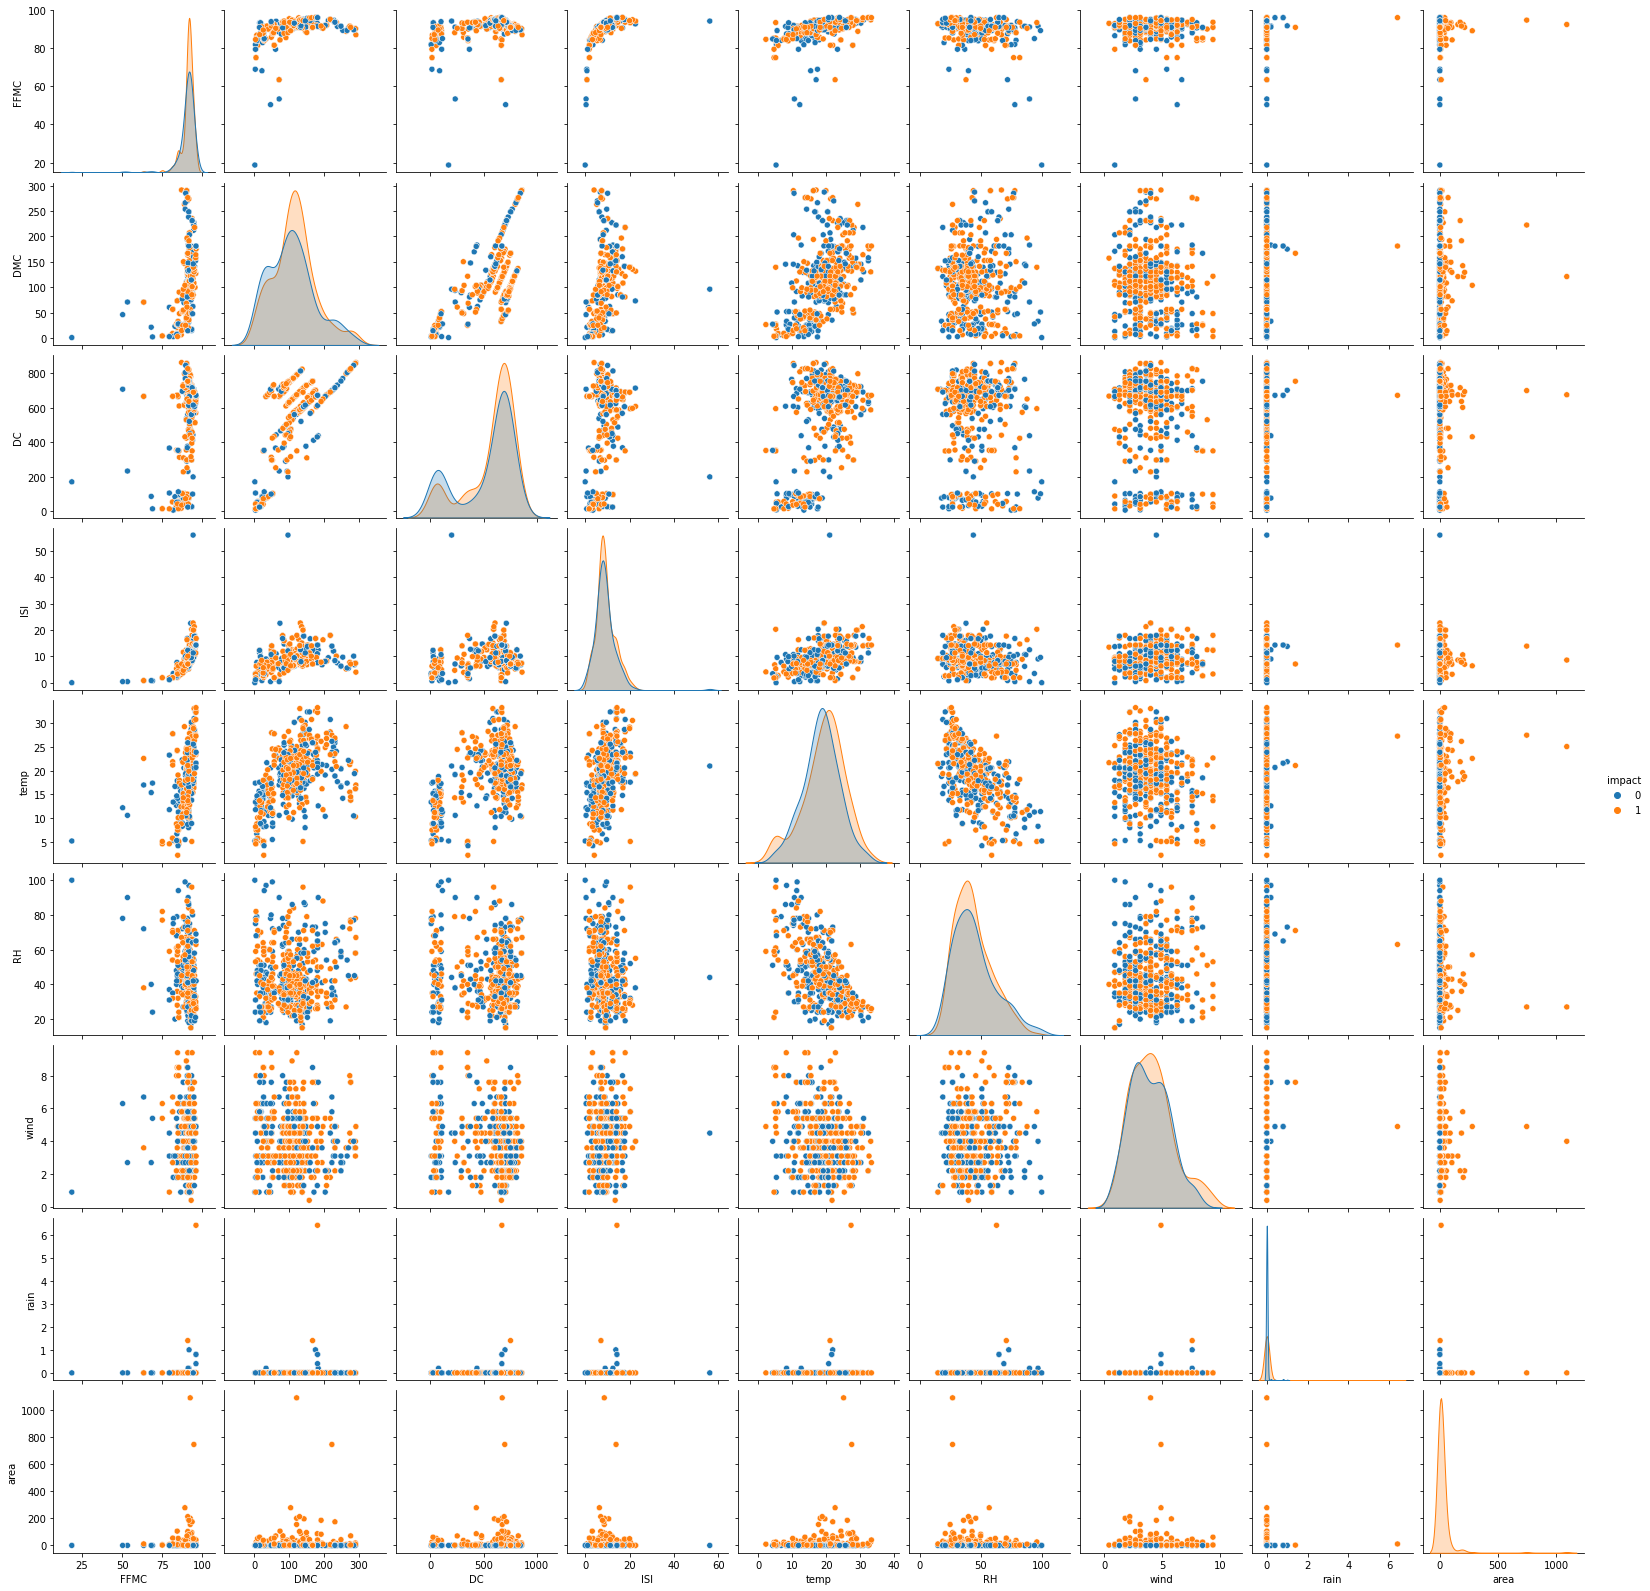

In [13]:
import seaborn as sns
sns.pairplot(data , hue='impact')
#plotting my class lable

In [37]:
target = data.impact

In [38]:
#dividing dataset into 70-30% training and testing 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3)

In [39]:
print(len(x_train))
print(len(x_test))

361
156


**EUCLIDIAN DISTANCE MEASURE:**

In [40]:
# NOW WITH K = 3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=3
[[40 48]
 [23 45]]
              precision    recall  f1-score   support

           0       0.63      0.45      0.53        88
           1       0.48      0.66      0.56        68

    accuracy                           0.54       156
   macro avg       0.56      0.56      0.54       156
weighted avg       0.57      0.54      0.54       156



In [41]:
print("model score when k=3 is :",  knn.score(x_test, y_test))

model score when k=3 is : 0.5448717948717948


In [42]:
# NOW WITH K = 7
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=7')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=7
[[35 53]
 [25 43]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.47        88
           1       0.45      0.63      0.52        68

    accuracy                           0.50       156
   macro avg       0.52      0.52      0.50       156
weighted avg       0.52      0.50      0.50       156



In [43]:
print("model score when k=7 is :",  knn.score(x_test, y_test))

model score when k=7 is : 0.5


In [44]:
# NOW WITH K = 11
knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=11')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=11
[[28 60]
 [22 46]]
              precision    recall  f1-score   support

           0       0.56      0.32      0.41        88
           1       0.43      0.68      0.53        68

    accuracy                           0.47       156
   macro avg       0.50      0.50      0.47       156
weighted avg       0.51      0.47      0.46       156



In [45]:
print("model score when k=11 is :",  knn.score(x_test, y_test))

model score when k=11 is : 0.47435897435897434


**MINKOWSKI DISTANCE MEASURE:**

In [46]:
x_train1 , x_test1 , y_train1 , y_test1 =  train_test_split(inputs, target, test_size = 0.3) 

In [47]:
# NOW WITH K = 3
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

knn.fit(x_train,y_train)

pred = knn.predict(x_test)

print('WITH K=3 \n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=3 

[[40 48]
 [23 45]]
              precision    recall  f1-score   support

           0       0.63      0.45      0.53        88
           1       0.48      0.66      0.56        68

    accuracy                           0.54       156
   macro avg       0.56      0.56      0.54       156
weighted avg       0.57      0.54      0.54       156



In [48]:
# p: int, default=2
# Power parameter for the Minkowski metric.
#  When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

In [49]:
# NOW WITH K = 7
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)

knn.fit(x_train,y_train)

pred = knn.predict(x_test)

print('WITH K=7 \n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=7 

[[35 53]
 [25 43]]
              precision    recall  f1-score   support

           0       0.58      0.40      0.47        88
           1       0.45      0.63      0.52        68

    accuracy                           0.50       156
   macro avg       0.52      0.52      0.50       156
weighted avg       0.52      0.50      0.50       156



In [50]:
# NOW WITH K = 11
knn = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)

knn.fit(x_train,y_train)

pred = knn.predict(x_test)

print('WITH K=11 \n')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

WITH K=11 

[[28 60]
 [22 46]]
              precision    recall  f1-score   support

           0       0.56      0.32      0.41        88
           1       0.43      0.68      0.53        68

    accuracy                           0.47       156
   macro avg       0.50      0.50      0.47       156
weighted avg       0.51      0.47      0.46       156



Maximum accuracy:- 0.5512820512820513 at K = 0


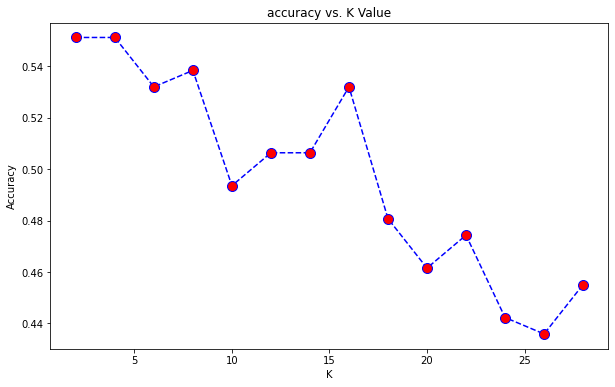

In [51]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(2, 30, 2):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(2,30,2), acc,  color = 'blue', linestyle='dashed',  marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
#running a for loop from 1 to 6 on minkowski distance measure

Maximum accuracy:- 0.5512820512820513 at K = 1


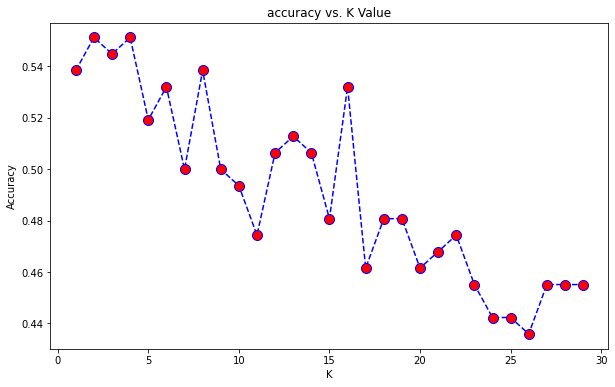

In [52]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1, 30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30), acc,  color = 'blue', linestyle='dashed',  marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))
#running a for loop from 1 to 6 on minkowski distance measure